# Исследование факторов определяющих успех компьютерных игр

## Общие положения

**Заказчик** — отдел маркетинга / медиапланирования интернет-магазина «Стримчик»

**Цель исследования** - выявить закономерности, определяющие успешность игры для планирования рекламной кампании и определения потенциально популярных продуктов на 2017 год.

**Исходные данные** — данные до 2016 года.

**Дополнительные вопросы, которые интересуют заказчика:**

1. За какой характерный срок появляются новые и исчезают старые игровые платформы?
2. Какой период можно считать актуальным?
3. Какие платформы лидируют по продажам, растут или падают? 
4. Что можно сказать о самых прибыльных жанрах? 
5. Выделяются ли жанры с высокими и низкими продажами
6. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
7. Одинаковы ли средние рейтинги платформ Xbox One и PC?
8. Отличаются ли средние пользовательские рейтинги жанров Action  и Sports?

**Основные шаги:**

- Изучение данных
- Предобработка данных
- Исследовательский анализ данных
- Составление портретов пользователей по регионам
- Формулировка и проверка гипотез
- Формулировка выводов


### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**!** Данные за 2016 год могут быть неполными.

### Рейтинг ESRB

- **«EC» («Early childhood»)** — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- **«E» («Everyone»)** — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- **«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- **«T» («Teen»)** — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **«M» («Mature»)** — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

## Изучение данных

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#чтение файла
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/games.csv')
df.head()    

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#изучение данных - проверка пропусков
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


#### Вывод
- Есть пропуски в данных о названии игр, датах их выпуска, жанрах, оценках критиков, оценках пользователей, рейтинге. 

- Заполнить данные об оценках критиков, пользователей, рейтинге характерными значениями мы не можем, т.к. оценка уникальна для каждой игры и данные будут не релеванты. Заменить на ноль их также нельзя, т.к. 0 может быть одной из оценок. С ними целесообразно ничего не делать. Пропуски могут быть связаны с тем, что одна игра идет на разные платформы и не для всех рейтинги присвоены.

- Жанр и имя пропущенно в 2х строках. Возможно, в одних и тех же, это необходимо проверить, может быть и рейтинги там пропущены, тогда строки проще удалить, т.к. они неинформативны. 

- У 269 игр пропущен год выпуска. Следует рассмотреть эти игры подробнее на предмет наличия там значительных продаж, высоких оценок и.т.п. Но поскольку необходимо определить актуальный период и рассматривать динамику показателей по годам, то для этого конкретного исследования их целесообразно будет удалить.

## Предобработка данных

In [4]:
# приведение названий столбцов и данных в столбцах name, platform, genre к нижнему регистру
df.columns = df.columns.str.lower()
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()
display(df.head())
#проверка дубликатов
df.duplicated().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


0

#### Комментарий
Названия столбцов, игр, платформ, жанров переведены в нижний регистр.
Полные дубликаты на данном этапе отсутствуют.

In [5]:
#заменим NaN в имени и жанре на пустые строки
df[['name', 'genre']] = df[['name', 'genre']].fillna(value='')
#проверка строк с пропуском жанра и имени
display(df.query('name == ""'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,,gen,1993.0,,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,,gen,1993.0,,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
#удаление строк без жанра и имени, т.к. они неинформативны и данные по рейтингам у них отсутствуют
df = df.drop(df[df.name == ''].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [7]:
#просмотр уникальных значений
for col in df:
    print(col.upper())
    print(df[col].value_counts()) 

NAME
need for speed: most wanted       12
ratatouille                        9
madden nfl 07                      9
fifa 14                            9
lego marvel super heroes           9
                                  ..
ufc: sudden impact                 1
blazer drive                       1
parfait: chocolat second style     1
nfl quarterback club 98            1
earthbound                         1
Name: name, Length: 11559, dtype: int64
PLATFORM
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       98
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64
YEAR_OF_RELEASE
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2

In [8]:
#анализ строк с пропущенной датой выпуска
display(df.query('year_of_release == "NaN"').sort_values(by = 'na_sales', ascending = False))
# удаление строк с пропущенной датой
df_with_dates = df.query('year_of_release != "NaN"')
df_with_dates.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,demon chaos,ps2,NaN,action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,egg monster hero,ds,NaN,role-playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,umineko no naku koro ni san: shinjitsu to gens...,ps3,NaN,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,luminous arc 2 (jp sales),ds,NaN,role-playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Комментарий
- Среди игр с пропущенным годом выпуска есть бестселлеры с высокими рейтингами, например, madden nfl 2004. У некоторых игр в названиях указан год. Но заполнить пропущенные года на основе имеющихся данных невозможно. Необходимо поставить в известность дата инженеров. Для анализа периодов и динамики создадим датафрейм df_with_dates, где останутся строки с годами.
- В столбце user_score (пользовательский рейтинг) есть значения 'tbd' (To Be Determined) - это неопределенные значения, которые, по сути, являются пропусками. Из-за данных значений столбец имеет тип object. Его следует перевести в числовой формат, заменяя строковые значения на пропуски ('NaN).

In [9]:
#замена типа данных для USER_SCORE
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [10]:
#анализ строк с пропущенной датой выпуска
display(df.query('year_of_release == "NaN"').sort_values(by = 'na_sales', ascending = False))
# удаление строк с пропущенной датой + перевод годов в тип int
df_with_dates = df.query('year_of_release != "NaN"')
df_with_dates['year_of_release'] = df_with_dates['year_of_release'].astype('int')
df_with_dates.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
...,...,...,...,...,...,...,...,...,...,...,...
11000,demon chaos,ps2,NaN,action,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10837,egg monster hero,ds,NaN,role-playing,0.00,0.00,0.09,0.00,NaN,NaN,E
15022,umineko no naku koro ni san: shinjitsu to gens...,ps3,NaN,adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
10764,luminous arc 2 (jp sales),ds,NaN,role-playing,0.00,0.00,0.10,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Комментарий
Среди игр с пропущенным годом выпуска есть бестселлеры с высокими рейтингами, например, madden nfl 2004. У некоторых игр в названиях указан год. Но заполнить пропущенные года на основе имеющихся данных невозможно. Необходимо поставить в известность дата инженеров. Для анализа периодов и динамики создадим датафрейм df_with_dates, где останутся строки с годами.

In [11]:
display(df.query('name == "need for speed: most wanted"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


#### Комментарий
Названия некоторых игр встречаются больше одного раза из-за того, что они портированы на различные платформы и даты релиза по этим платформам различаются. Также могут различаться, либо отсутствовать рейтинги для конректной платформы.

In [12]:
# добавление суммарных продаж по регионам
df_with_dates['sum_sales'] = df_with_dates['na_sales'] + df_with_dates['eu_sales'] + df_with_dates['jp_sales'] + df_with_dates['other_sales']
df_with_dates.reset_index()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Исследовательский анализ данных

### Определение актуального периода для анализа, основных платформ

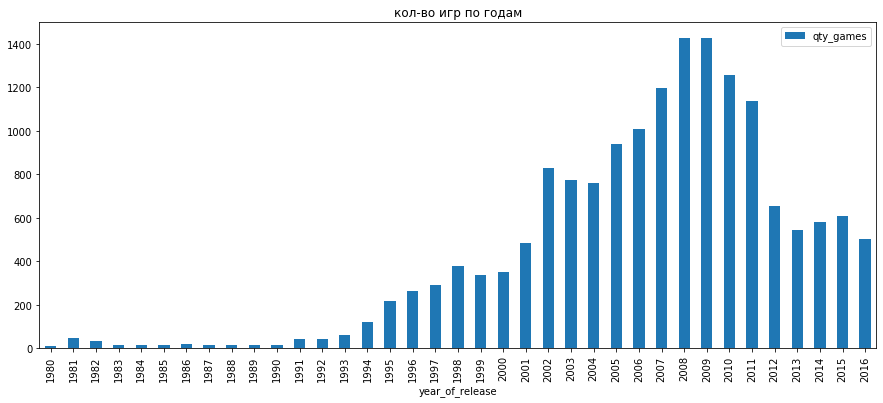

In [13]:
#анализ кол-ва игр по годам
game_qty = df_with_dates.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
game_qty.columns = ['qty_games']
game_qty_plot = game_qty.plot(kind = 'bar', y='qty_games',  title = 'кол-во игр по годам', figsize = (15,6))

platform,year_of_release,2600,3do,3ds,dc,ds,gb,gba,gc,gen,...,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
0,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1989,0.63,0.00,0.00,0.00,0.00,64.97,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


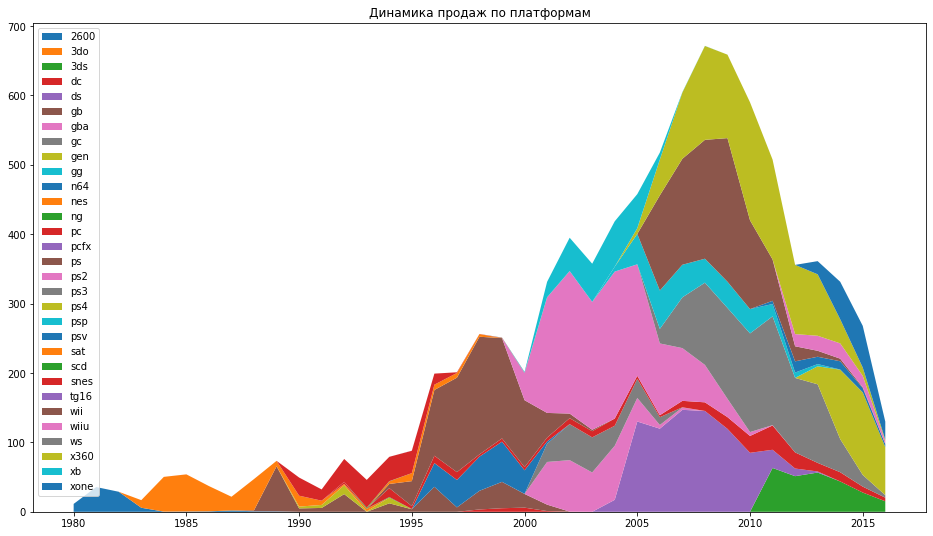

In [14]:
#сводная по годам с группировкой по платформам
year_platform_sales = df_with_dates.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc=['sum'])
#year_platform_sales.columns = ['sum_sales']
year_platform_sales.columns = year_platform_sales.columns.get_level_values(1)
year_platform_sales = year_platform_sales.reset_index()

# формируем диаграмму с областями по всем платформам stacked area Chart
fig, ax = plt.subplots(1,1,figsize=(16, 9))
year_platform_sales = year_platform_sales.fillna(0)
display(year_platform_sales)
columns1 = year_platform_sales.columns[1:]
labs1 = columns1.values.tolist()
x1= year_platform_sales['year_of_release']
y1 = year_platform_sales['2600']
y2 = year_platform_sales['3do']
y3 = year_platform_sales['3ds']
y4 = year_platform_sales['dc']
y5 = year_platform_sales['ds']
y6 = year_platform_sales['gb']
y7 = year_platform_sales['gba']
y8 = year_platform_sales['gc']
y9 = year_platform_sales['gen']
y10 = year_platform_sales['gg']
y11 = year_platform_sales['n64']
y12 = year_platform_sales['nes']
y13 = year_platform_sales['ng']
y14 = year_platform_sales['pc']
y15 = year_platform_sales['pcfx']
y16 = year_platform_sales['ps']
y17 = year_platform_sales['ps2']
y18 = year_platform_sales['ps3']
y19 = year_platform_sales['ps4']
y20 = year_platform_sales['psp']
y21 = year_platform_sales['psv']
y22 = year_platform_sales['sat']
y23 = year_platform_sales['scd']
y24 = year_platform_sales['snes']
y25 = year_platform_sales['tg16']
y26 = year_platform_sales['wii']
y27 = year_platform_sales['wiiu']
y28 = year_platform_sales['ws']
y29 = year_platform_sales['x360']
y30 = year_platform_sales['xb']
y31 = year_platform_sales['xone']
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19, y20, y21, y22, y23, y24, y25, y26, y27, y28, y29, y30, y31])

ax.stackplot(x1, y, labels= labs1)
plt.title('Динамика продаж по платформам')
plt.legend(loc='upper left')

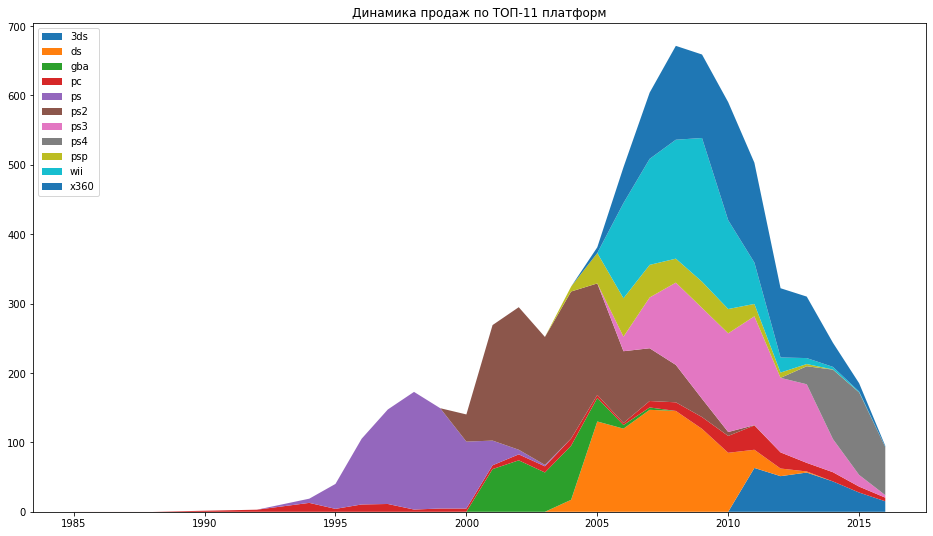

In [37]:
#сводная по платформам с наибольшими продажами за все периоды
platforms_sales_TOP11 = df_with_dates.pivot_table(index='platform', values='sum_sales', aggfunc=['sum'])
platforms_sales_TOP11.columns = ['sum_sales']
platforms_sales_TOP11 = platforms_sales_TOP11.sort_values(by = 'sum_sales', ascending = False).head(11)
platforms_sales_TOP11 = platforms_sales_TOP11.reset_index()
platforms_sales_TOP11_names = platforms_sales_TOP11['platform']

#делаем срез по основным платформам
df_TOP_platforms = df_with_dates.query('platform in @platforms_sales_TOP11_names')
# формируем сводную TOP10+PC платформам
TOP_platforms_pivot = df_TOP_platforms.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc=['sum'])
TOP_platforms_pivot.columns = TOP_platforms_pivot.columns.get_level_values(1)
TOP_platforms_pivot = TOP_platforms_pivot.reset_index()

# формируем диаграмму с областями по всем платформам stacked area Chart
TOP_platforms_pivot = TOP_platforms_pivot.fillna(0)
fig, ax = plt.subplots(1,1,figsize=(16, 9))
columns2 = TOP_platforms_pivot.columns[1:]
labs2 = columns2.values.tolist()
x= TOP_platforms_pivot['year_of_release']
y1 = TOP_platforms_pivot['3ds']
y2 = TOP_platforms_pivot['ds']
y3 = TOP_platforms_pivot['gba']
y4 = TOP_platforms_pivot['pc']
y5 = TOP_platforms_pivot['ps']
y6 = TOP_platforms_pivot['ps2']
y7 = TOP_platforms_pivot['ps3']
y8 = TOP_platforms_pivot['ps4']
y9 = TOP_platforms_pivot['psp']
y10 = TOP_platforms_pivot['wii']
y11 = TOP_platforms_pivot['x360']
y = np.vstack([y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11])


ax.stackplot(x, y, labels= labs2)
plt.title('Динамика продаж по ТОП-11 платформ')
plt.legend(loc='upper left')

#### Вывод
- На графике распределения кол-ва игр по годам и диаграмме с областями видно, что пик приходится на 2008-2009 годы, затем следует спад кол-ва выпускаемых игр и продаж их копий до 2013 года. После этого кол-во стабилизируется.
- На диаграмме с областями и в сводной таблице по TOP11 платформам с наибольшими продажами видно, что средний жизненный цикл платформы - около 5-6 лет. Например, основные продажи платформ Sony:
    - ps(1995 - 2001)
    - ps2(2001 - 2007)
    - psp (2005 - 2011)
    - ps3(2007 - 2013)
    - ps4 (2014 - ...)
- На основе этих данных можно выделить **актуальный период** - 2013 - 2015 год, в этот период кол-во выпускаемых игр стабилизируется после падения с пиков 2008-2009 года + растет доля новой платформы Sony PS4(и его конкурента XONE). 2016 год - вероятно неполный
- Из перспективных платформ в данных период можно выделить: PS4(новая, перспективная платформа), XONE (конкурент PS4, продажи начались в 2013 году, в ТОП10 пока не вошла за все периоды) и 3ds(платформа, со снижающимися продажами), PS3(платформа, со снижающимися продажами), X360(платформа, со снижающимися продажами), также интересна PC(относительно стабильная доля с 90х годов)

### Анализ основных платформ и жанров

#### Платформы и продажи

In [16]:
#делаем срез данных за актуальный период
df_relevant_period = df_with_dates.query('2013 <= year_of_release <= 2015')
#выводим TOP5 платформ
platforms_sales_TOP5 = df_relevant_period.pivot_table(index='platform', values='sum_sales', aggfunc=['sum'])
platforms_sales_TOP5.columns = ['sum_sales']
platforms_sales_TOP5 = platforms_sales_TOP5.sort_values(by = 'sum_sales', ascending = False).head(5)
#df_relevant_period.info()
display(platforms_sales_TOP5)
#формируем лист основных платформ и делаем срез по этим 5 платформам + PC факультативно
key_platform_list = ['ps3', 'ps4', 'x360', 'xone', '3ds', 'pc']
key_platform_query = df_relevant_period.query('platform in @key_platform_list')
#display(key_platform_query.info())

,sum_sales
platform,
ps4,244.89
ps3,177.83
x360,135.28
xone,133.17
3ds,128.11


(-1, 14)

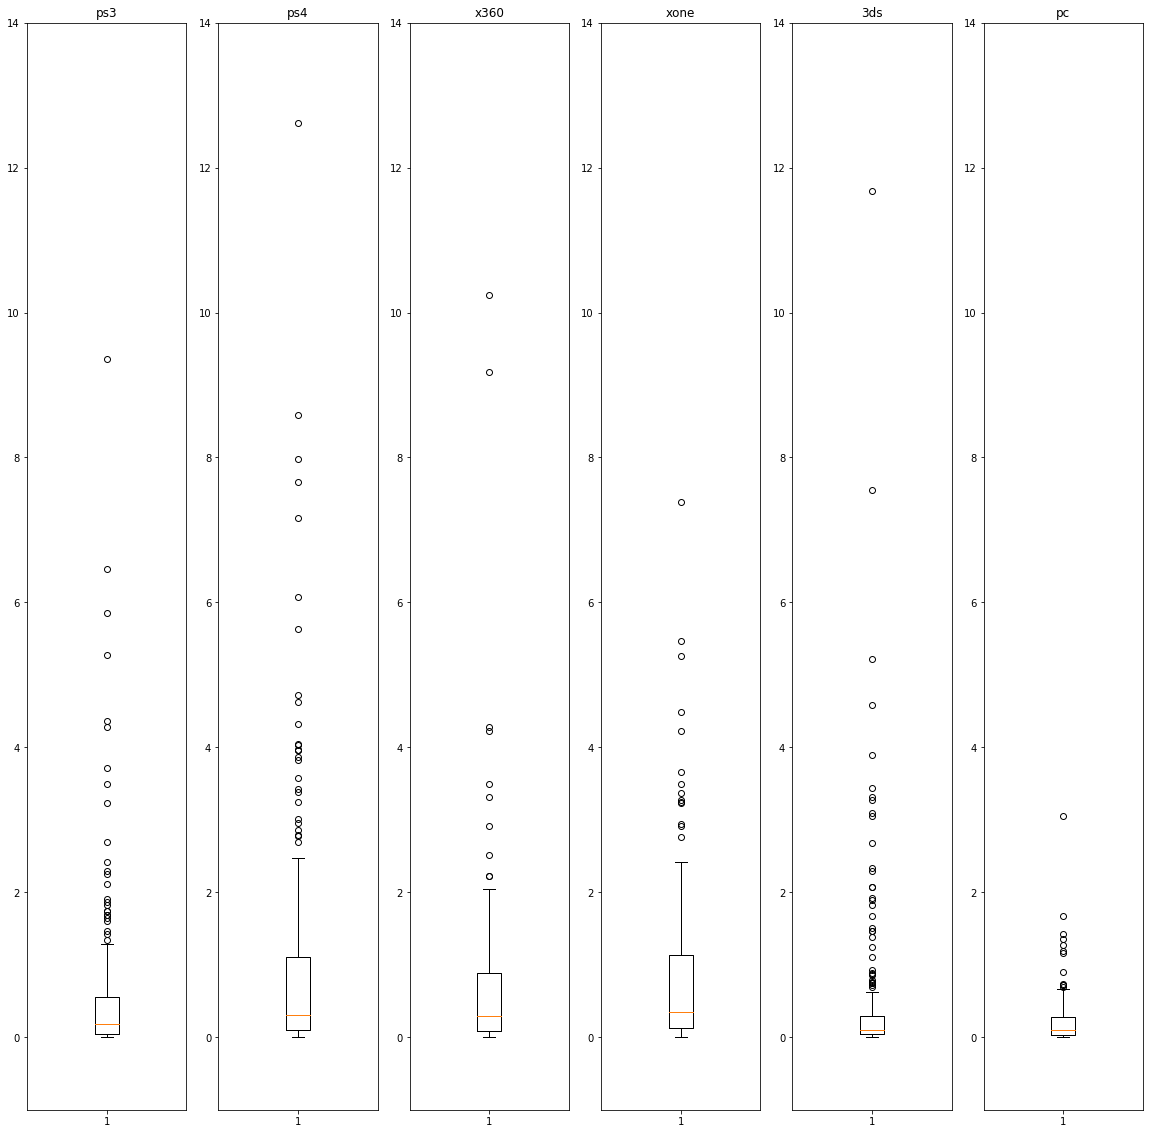

In [17]:
#построение графиков "ящик с усами" по платформам
ps3_query = key_platform_query.query('platform == "ps3"')
ps4_query = key_platform_query.query('platform == "ps4"')  
x360_query = key_platform_query.query('platform == "x360"')
xone_query = key_platform_query.query('platform == "xone"')
three_ds_query = key_platform_query.query('platform == "3ds"')
pc_query = key_platform_query.query('platform == "pc"')
                                     
fig, axes = plt.subplots(1,6, figsize = (20,20))
axes[0].boxplot(ps3_query['sum_sales'])
axes[0].set_title("ps3")
axes[1].boxplot(ps4_query['sum_sales'])
axes[1].set_title("ps4")
axes[2].boxplot(x360_query['sum_sales'])
axes[2].set_title("x360")
axes[3].boxplot(xone_query['sum_sales'])   
axes[3].set_title("xone")
axes[4].boxplot(three_ds_query['sum_sales'])
axes[4].set_title("3ds")
axes[5].boxplot(pc_query['sum_sales'])
axes[5].set_title("pc")

plt.sca(axes[0])
plt.ylim(-1, 14)
plt.sca(axes[1])
plt.ylim(-1, 14)
plt.sca(axes[2])
plt.ylim(-1, 14)
plt.sca(axes[3])
plt.ylim(-1, 14)
plt.sca(axes[4])
plt.ylim(-1, 14)
plt.sca(axes[5])
plt.ylim(-1, 14)

In [18]:
# вывод описаний данных
display('ps3')
display(ps3_query['sum_sales'].describe()) 
display('ps4')
display(ps4_query['sum_sales'].describe()) 
display('x360')
display(x360_query['sum_sales'].describe()) 
display('xone')
display(xone_query['sum_sales'].describe())
display('three_ds_query')
display(three_ds_query['sum_sales'].describe()) 
display('pc_query')
display(pc_query['sum_sales'].describe())

'ps3'

count    307.000000
mean       0.579251
std        1.530432
min        0.010000
25%        0.050000
50%        0.190000
75%        0.560000
max       21.050000
Name: sum_sales, dtype: float64

'ps4'

count    228.000000
mean       1.074079
std        1.899788
min        0.010000
25%        0.097500
50%        0.310000
75%        1.105000
max       14.630000
Name: sum_sales, dtype: float64

'x360'

count    173.000000
mean       0.781965
std        1.715684
min        0.010000
25%        0.090000
50%        0.290000
75%        0.890000
max       16.270000
Name: sum_sales, dtype: float64

'xone'

count    160.000000
mean       0.832313
std        1.182243
min        0.010000
25%        0.130000
50%        0.350000
75%        1.137500
max        7.390000
Name: sum_sales, dtype: float64

'three_ds_query'

count    257.000000
mean       0.498482
std        1.431660
min        0.010000
25%        0.040000
50%        0.100000
75%        0.290000
max       14.600000
Name: sum_sales, dtype: float64

'pc_query'

count    135.000000
mean       0.253185
std        0.399785
min        0.010000
25%        0.030000
50%        0.100000
75%        0.285000
max        3.050000
Name: sum_sales, dtype: float64

##### Вывод
- У всех платформ средние продажи значительно больше медианных и есть длинный "хвост" вправо. Это говорит о наличии бестселлеров с выдающимися значениями по продажам.
- У PS4, X360, XONE примерно близкие медианные продажи (0,3 - 0,35 млн.) и средние (ок.1 млн) - это платформы-лидеры по продажам.

#### Рейтинги и продажи

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.237087,0.088415
critic_score,0.237087,1.000000,0.579671
user_score,0.088415,0.579671,1.000000


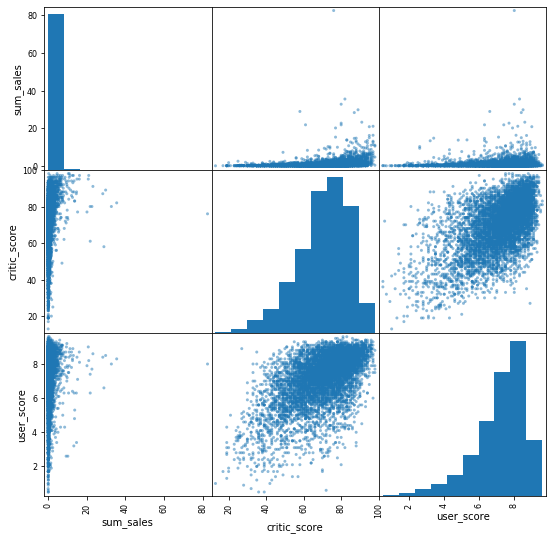

In [19]:
#выборка игр с рейтингами за все годы
df_with_dates_ratings = df_with_dates.query('critic_score != "NaN" and user_score != "NaN"')
#построение диаграмм рассеивания по всем играм за все годы
pd.plotting.scatter_matrix(df_with_dates_ratings[['sum_sales', 'critic_score', 'user_score']] , figsize=(9, 9))
display(df_with_dates_ratings[['sum_sales', 'critic_score', 'user_score']].corr())

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.332731,0.017431
critic_score,0.332731,1.000000,0.525413
user_score,0.017431,0.525413,1.000000


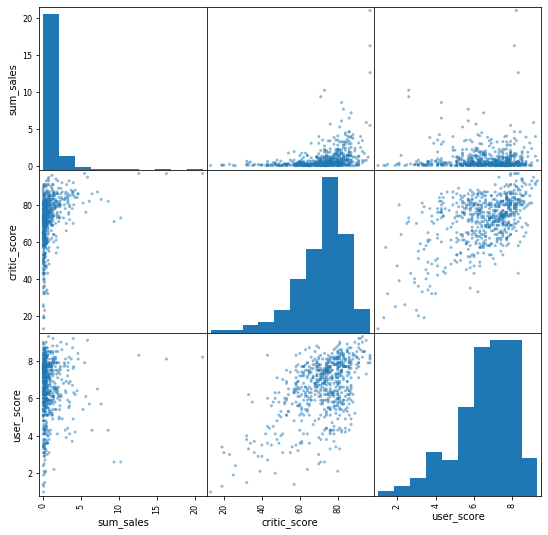

In [20]:
#выборка игр с рейтингами для всех ключевых платформ за актуальный период
key_platform_rating = key_platform_query.query('critic_score != "NaN" and user_score != "NaN"')
#построение диаграмм рассеивания для всех ключевых платформ
pd.plotting.scatter_matrix(key_platform_rating[['sum_sales', 'critic_score', 'user_score']] , figsize=(9, 9))
display(key_platform_rating[['sum_sales', 'critic_score', 'user_score']].corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 31 to 16398
Data columns (total 12 columns):
name               228 non-null object
platform           228 non-null object
year_of_release    228 non-null int64
genre              228 non-null object
na_sales           228 non-null float64
eu_sales           228 non-null float64
jp_sales           228 non-null float64
other_sales        228 non-null float64
critic_score       154 non-null float64
user_score         156 non-null float64
rating             152 non-null object
sum_sales          228 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 23.2+ KB


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.430777,0.018139
critic_score,0.430777,1.000000,0.612451
user_score,0.018139,0.612451,1.000000


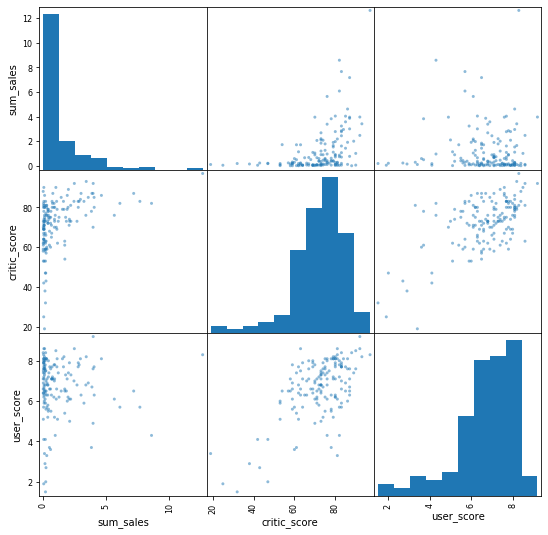

In [21]:
#подготовим данные по ps4 к анализу корреляции между рейтингами и продажами
ps4_query.info()
#выборка только игру с рейтингами для ps4
ps4_query_rating = ps4_query.query('critic_score != "NaN" and user_score != "NaN"')
#построение диаграмм рассеивания для ps4
pd.plotting.scatter_matrix(ps4_query_rating[['sum_sales', 'critic_score', 'user_score']] , figsize=(9, 9))
display(ps4_query_rating[['sum_sales', 'critic_score', 'user_score']].corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 99 to 16597
Data columns (total 12 columns):
name               160 non-null object
platform           160 non-null object
year_of_release    160 non-null int64
genre              160 non-null object
na_sales           160 non-null float64
eu_sales           160 non-null float64
jp_sales           160 non-null float64
other_sales        160 non-null float64
critic_score       109 non-null float64
user_score         116 non-null float64
rating             115 non-null object
sum_sales          160 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.2+ KB


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.451360,-0.051243
critic_score,0.451360,1.000000,0.499502
user_score,-0.051243,0.499502,1.000000


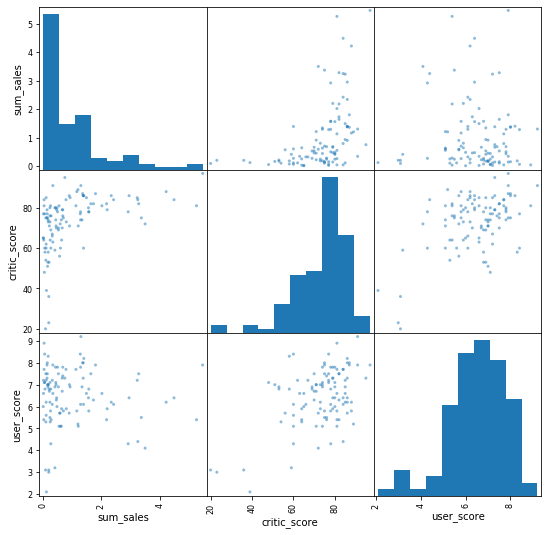

In [22]:
#подготовим данные по XONE к анализу корреляции между рейтингами и продажами
xone_query.info()
#выборка только игру с рейтингами для XONE
xone_query_rating = xone_query.query('critic_score != "NaN" and user_score != "NaN"')
#построение диаграмм рассеивания для XONE
pd.plotting.scatter_matrix(xone_query_rating[['sum_sales', 'critic_score', 'user_score']] , figsize=(9, 9))
display(xone_query_rating[['sum_sales', 'critic_score', 'user_score']].corr())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 23 to 16654
Data columns (total 12 columns):
name               173 non-null object
platform           173 non-null object
year_of_release    173 non-null int64
genre              173 non-null object
na_sales           173 non-null float64
eu_sales           173 non-null float64
jp_sales           173 non-null float64
other_sales        173 non-null float64
critic_score       81 non-null float64
user_score         136 non-null float64
rating             139 non-null object
sum_sales          173 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 17.6+ KB


,sum_sales,critic_score,user_score
sum_sales,1.000000,0.350345,-0.006238
critic_score,0.350345,1.000000,0.520946
user_score,-0.006238,0.520946,1.000000


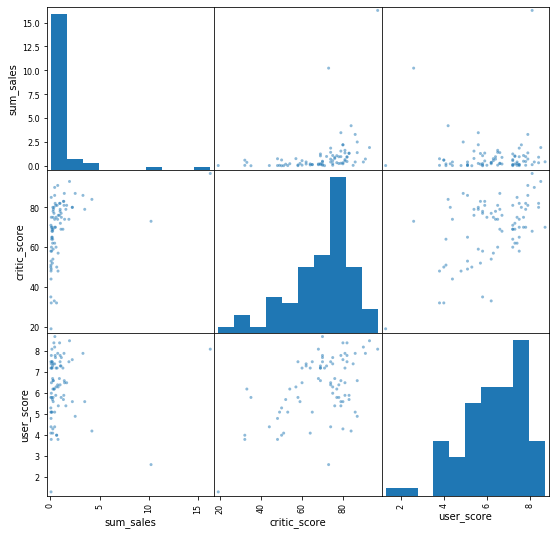

In [23]:
#подготовим данные по x360 к анализу корреляции между рейтингами и продажами
x360_query.info()
#выборка только игру с рейтингами для x360
x360_query_rating = x360_query.query('critic_score != "NaN" and user_score != "NaN"')
#построение диаграмм рассеивания для x360
pd.plotting.scatter_matrix(x360_query_rating[['sum_sales', 'critic_score', 'user_score']] , figsize=(9, 9))
display(x360_query_rating[['sum_sales', 'critic_score', 'user_score']].corr())

##### Вывод
Анализ корреляции между рейтингами и продажами показал, что:
- корреляция между отзывами критиков и продажами слабая от 0.3 до 0.5, а между отзывами пользователей и продажами ее практически нет. 
- между отзывами пользователей и критиков корреляция средняя - около 0.5-0.6

### Анализ жанров

In [24]:
# строим сводную по продажам ключевых платформ в разрезе жанров
key_platform_genres_stat = key_platform_query.pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'count'])
key_platform_genres_stat.columns = ['sum_sales', 'game_qty']
display(key_platform_genres_stat.sort_values(by = 'sum_sales', ascending = False))

,sum_sales,game_qty
genre,,
action,266.78,434
shooter,188.21,131
sports,121.16,137
role-playing,116.15,164
misc,42.84,76
racing,29.64,56
fighting,24.67,52
platform,19.94,36
simulation,19.28,39


#### Вывод
- Тройка самых продаваемых жанров на ТОП5 платформах + PC: экшн, шутеры и спорт
- В жанре экшн больше всего игр, а жанр ролевые игры превосходит по кол-в игр шутеры и спорт, но уступает им в продажах
- Тройка наименее продаваемых жанров: головоломки (puzzle), стратегии и приключения

## Портреты пользователей по регионам

### Анализ платформ

,sum_sales
platform,
ps4,244.89
ps3,177.83
x360,135.28
xone,133.17
3ds,128.11


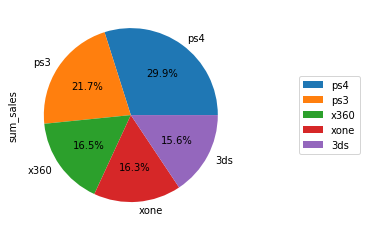

In [25]:
#расчет доли TOP5 платформ суммарных продаж
display(platforms_sales_TOP5.head())
platforms_sales_TOP5.plot(y='sum_sales', kind='pie', autopct='%1.1f%%')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [26]:
#доля продаж по регионам
print('Продажи в Северной Америке')
display(df_relevant_period['na_sales'].sum())
print('Продажи в Европе')
display(df_relevant_period['eu_sales'].sum())
print('Продажи в Японии')
display(df_relevant_period['jp_sales'].sum())

Продажи в Северной Америке


392.78

Продажи в Европе


341.01

Продажи в Японии


121.47000000000003

In [27]:
#подготовка данных по регионам
na_platforms = df_relevant_period.pivot_table(index='platform', values='na_sales', aggfunc=['sum'])
na_platforms.columns = ['sales']
na_platforms_TOP5 = na_platforms.sort_values(by = 'sales', ascending = False).head(5)

eu_platforms = df_relevant_period.pivot_table(index='platform', values='eu_sales', aggfunc=['sum'])
eu_platforms.columns = ['sales']
eu_platforms_TOP5 = eu_platforms.sort_values(by = 'sales', ascending = False).head(5)


jp_platforms = df_relevant_period.pivot_table(index='platform', values='jp_sales', aggfunc=['sum'])
jp_platforms.columns = ['sales']
jp_platforms_TOP5 = jp_platforms.sort_values(by = 'sales', ascending = False).head(5)

Text(0.5, 1.0, 'jp')

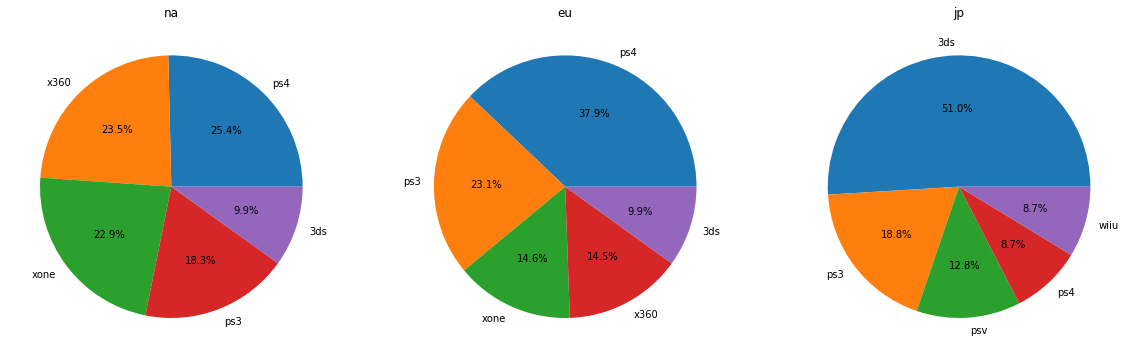

In [28]:
#построение круговых диаграмм по регионом с долями TOP5 платформ
fig, axes = plt.subplots(1,3, figsize = (20,20))
axes[0].pie(na_platforms_TOP5['sales'], labels = na_platforms_TOP5.index, autopct='%1.1f%%')
axes[0].set_title("na")
axes[1].pie(eu_platforms_TOP5['sales'], labels = eu_platforms_TOP5.index, autopct='%1.1f%%')
axes[1].set_title("eu")
axes[2].pie(jp_platforms_TOP5['sales'], labels = jp_platforms_TOP5.index, autopct='%1.1f%%')
axes[2].set_title("jp")

#### Вывод
По суммарным продажам лидирует североамериканский рынок, далее следует европейский и японский замыкает тройку.

По платформам в продажах по всем регионам лидируют PS3 и PS4, но поскольку PS3 - платформа предыдущего поколения, ее доля будет снижаться. Это же касается ее конкурента - X360. Вероятнее всего их доли распределятся между PS4 и XONE.

Распределение долей платформ в продажах по регионам показывает, что:
- В регионе Северная Америка рынок делится примерно на равные доли между Microsoft (X360 и XONE) и Sony (PS3/4) доля 3ds около 10%
- В Европе доминирует платформы Sony (PS3/4) - 61%
- На Японском рынке большинство у платформы 3ds(52%), а также присутствуют платформы, отсутствующие в Европе и Америке (wiiu, psv) - их доля 21.5

### Анализ жанров

In [29]:
#подготовка данных по регионам
na_genres = df_relevant_period.pivot_table(index='genre', values='na_sales', aggfunc=['sum'])
na_genres.columns = ['sales']
na_genres_TOP5 = na_genres.sort_values(by = 'sales', ascending = False).head(5)

eu_genres = df_relevant_period.pivot_table(index='genre', values='eu_sales', aggfunc=['sum'])
eu_genres.columns = ['sales']
eu_genres_TOP5 = eu_genres.sort_values(by = 'sales', ascending = False).head(5)


jp_genres = df_relevant_period.pivot_table(index='genre', values='jp_sales', aggfunc=['sum'])
jp_genres.columns = ['sales']
jp_genres_TOP5 = jp_genres.sort_values(by = 'sales', ascending = False).head(5)

Text(0.5, 1.0, 'jp')

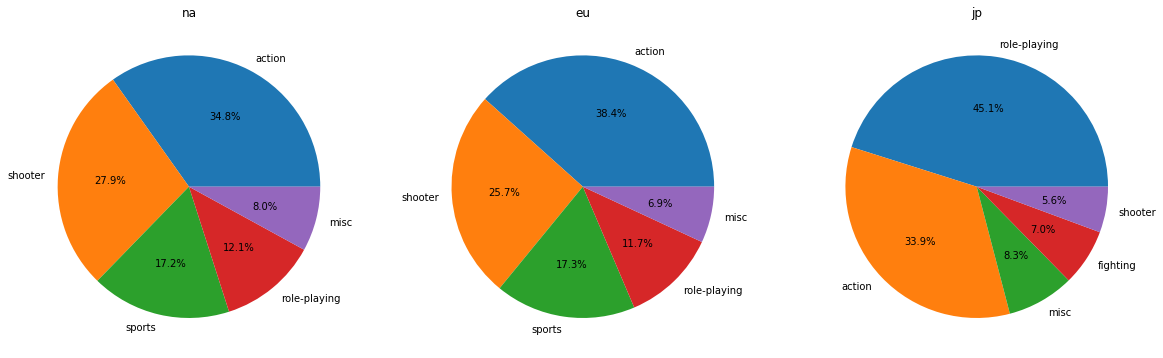

In [30]:
#построение круговых диаграмм по регионом с долями TOP5 жанров
fig, axes = plt.subplots(1,3, figsize = (20,20))
axes[0].pie(na_genres_TOP5['sales'], labels = na_genres_TOP5.index, autopct='%1.1f%%')
axes[0].set_title("na")
axes[1].pie(eu_genres_TOP5['sales'], labels = eu_genres_TOP5.index, autopct='%1.1f%%')
axes[1].set_title("eu")
axes[2].pie(jp_genres_TOP5['sales'], labels = jp_genres_TOP5.index, autopct='%1.1f%%')
axes[2].set_title("jp")

#### Вывод
Распределение долей жанров в продажах по регионам показывает, что:
- Предпочтения у американских и европейских пользователей схожи - основные жанры: action, shooter и sports
- У японских пользователей преоблатают ролевые игры и также экшн

### Анализ продаж и рейтинга ESRB

In [31]:
#удаление строк без рейтинга ESRB
df_relevant_period['rating'] = df_relevant_period['rating'].fillna(value='')
df_relevant_withESRB = df_relevant_period.drop(df_relevant_period[df_relevant_period.rating == ''].index)
#подготовка данных по регионам
na_ESRB = df_relevant_withESRB.pivot_table(index='rating', values='na_sales', aggfunc=['sum'])
na_ESRB.columns = ['sales']

eu_ESRB = df_relevant_withESRB.pivot_table(index='rating', values='eu_sales', aggfunc=['sum'])
eu_ESRB.columns = ['sales']


jp_genres = df_relevant_withESRB.pivot_table(index='rating', values='jp_sales', aggfunc=['sum'])
jp_genres.columns = ['sales']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'jp')

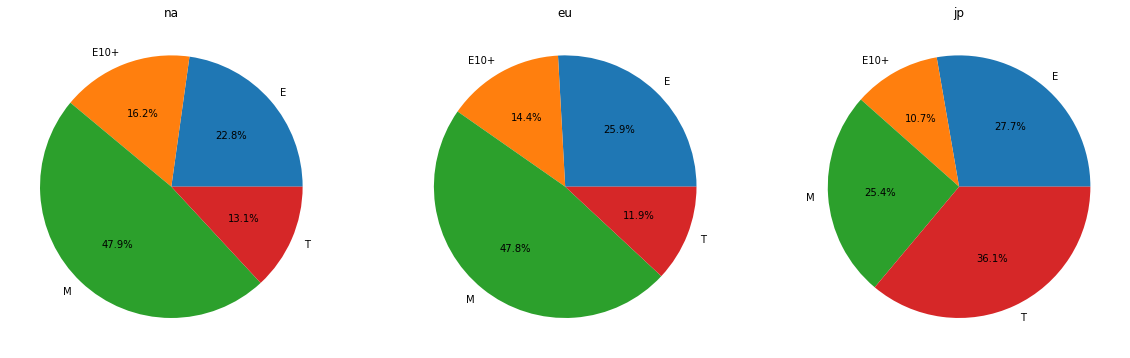

In [32]:
#построение круговых диаграмм по регионом с долями продаж по рейтингу ESRB
fig, axes = plt.subplots(1,3, figsize = (20,20))
axes[0].pie(na_ESRB['sales'], labels = na_ESRB.index, autopct='%1.1f%%')
axes[0].set_title("na")
axes[1].pie(eu_ESRB['sales'], labels = eu_ESRB.index, autopct='%1.1f%%')
axes[1].set_title("eu")
axes[2].pie(jp_genres['sales'], labels = jp_genres.index, autopct='%1.1f%%')
axes[2].set_title("jp")

#### Вывод
Распределение долей рейтингов в продажах по регионам показывает, что:
- Большинство продаж на американском и европейских рынках приходится на рейтинг «M» («Mature») — «Для взрослых», второй по доле рейтинг - «E» («Everyone») — «Для всех»
- Большнство продаж на японском рынке приходится на рейтинг «T» («Teen») — «Подросткам», а рейтинги M и E имеют примерно равные доли

## Формулировка и проверка гипотез

### Гипотеза о пользовательских рейтингах  Xbox One и PC

Имеем две генеральные совокупности по платформе Xbox One и PC за актуальный период 2013-2015. Нам необходимо понять, случайны ли различия по средним пользовательским рейтингам в их выборках.

**Нулевая гипотеза** - различий в генеральных совокупностях нет, т.е. рейтинги одинаковы.

**Альтернативная гипотеза** - пользовательские рейтинги действительно различаются.

In [33]:
#берем срезы с указанными платформами и отсекаем пропуски в пользовательских рейтингах
pc_query = pc_query.query('user_score != "NaN"')
xone_query = xone_query.query('user_score != "NaN"')
#вызываем описания данных
print('PC')
display(pc_query['user_score'].describe())
print('XONE')
display(xone_query['user_score'].describe())

# description уже содержит данные о стандартном отклонении (std), но задание также требует расчет дисперсии
print('Расчет дисперсии по рейтингам PC:')
variance = np.var(pc_query['user_score'])
print(variance)
print()
print('Расчет стандартного отклонения по рейтингам PC:')
print(np.sqrt(variance))
print()
print('Расчет дисперсии по рейтингам XONE:')
variance1 = np.var(xone_query['user_score'])
print(variance1)
print()
print('Расчет стандартного отклонения по рейтингам XONE:')
print(np.sqrt(variance1))

PC


count    110.000000
mean       6.258182
std        1.751193
min        1.400000
25%        5.325000
50%        6.750000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

XONE


count    116.000000
mean       6.477586
std        1.288213
min        2.100000
25%        5.775000
50%        6.700000
75%        7.300000
max        9.200000
Name: user_score, dtype: float64

Расчет дисперсии по рейтингам PC:
3.0387966942148763

Расчет стандартного отклонения по рейтингам PC:
1.743214471662875

Расчет дисперсии по рейтингам XONE:
1.6451872770511302

Расчет стандартного отклонения по рейтингам XONE:
1.28264853995595


In [34]:
#установим уровень статистической значимости
alpha = .01
#проверим гипотезу о равенстве среднего двух генеральных совокупностей, т.к. дисперсия и стандартное отклонение у выборок различается, поставим False в параметр equal_var
results_platforms = st.ttest_ind(pc_query['user_score'], xone_query['user_score'], equal_var = False)
print('p-значение:', results_platforms.pvalue)
if results_platforms.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.2867036680187632
Не получилось отвергнуть нулевую гипотезу


#### Вывод
Проверка гипотезы показала, что вероятность получить выявленные в выборках различия случайным образом > 28%, отвергнуть нулевую гипотезу не получилось. Таким образом, можно допустить, что средние пользовательские рейтинги у XONE и PC одинаковые

- Выбран уровень статистической значимости в 1%, т.к. уровень в 5% допускает, что в 1 из 20 исследовании нулевую гипотезу можно отвергнуть по ошибке.
- параметр equal_var = False, т.к. дисперсии в выборках различаются

### Гипотеза о пользовательских рейтингах жанров Action и Sports

Имеем две генеральные совокупности по жанрам Action и Sports за актуальный период 2013-2015. Нам необходимо понять, случайны ли различия по средним пользовательским рейтингам в их выборках.

**Нулевая гипотеза** - различий в генеральных совокупностях нет, т.е. рейтинги одинаковы.

**Альтернативная гипотеза** - пользовательские рейтинги действительно различаются.

In [35]:
#формируем выборки
action_selection = df_relevant_period.query('genre == "action" and user_score != "NaN"')
sports_selection = df_relevant_period.query('genre == "sports" and user_score != "NaN"')
#вызываем описания данных
print('Action')
display(action_selection['user_score'].describe())
print('Sports')
display(sports_selection['user_score'].describe())

# description уже содержит данные о стандартном отклонении (std), но задание также требует расчет дисперсии
print('Расчет дисперсии по рейтингам Action:')
variance2 = np.var(action_selection['user_score'])
print(variance)
print()
print('Расчет стандартного отклонения по рейтингам Action:')
print(np.sqrt(variance2))
print()
print('Расчет дисперсии по рейтингам Sports:')
variance3 = np.var(sports_selection['user_score'])
print(variance1)
print()
print('Расчет стандартного отклонения по рейтингам Sports:')
print(np.sqrt(variance3))

Action


count    304.000000
mean       6.893092
std        1.284762
min        2.400000
25%        6.400000
50%        7.200000
75%        7.700000
max        9.100000
Name: user_score, dtype: float64

Sports


count    123.000000
mean       5.179675
std        1.703418
min        1.400000
25%        4.050000
50%        5.400000
75%        6.300000
max        8.800000
Name: user_score, dtype: float64

Расчет дисперсии по рейтингам Action:
3.0387966942148763

Расчет стандартного отклонения по рейтингам Action:
1.2826466949819813

Расчет дисперсии по рейтингам Sports:
1.6451872770511302

Расчет стандартного отклонения по рейтингам Sports:
1.696479345782202


In [36]:
#установим уровень статистической значимости
alpha = .01
#проверим гипотезу о равенстве среднего двух генеральных совокупностей, т.к. дисперсия и стандартное отклонение у выборок различается, поставим False в параметр equal_var
results_genres = st.ttest_ind(action_selection['user_score'], sports_selection['user_score'], equal_var = False)
print('p-значение:', results_genres.pvalue)
if results_genres.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.5076737062533683e-19
Отвергаем нулевую гипотезу


#### Вывод
Проверка гипотезы показала, что вероятность получить выявленные в выборках различия случайным образом ничтожно мала, ее можно отвергнуть и считать, что различия между средними пользовательскими рейтингами в жанрах в генеральных совокупностях действительно есть - средние рейтинги экшн (ок.7  в выборке) > спорта (ок.5 в выборке)

## Общий вывод

### Резюме по подготовке данных

**Пропуски и дубликаты**
- В ходе анализа были выявлены пропуски в данных о названии игр, датах их выпуска, жанрах, оценках критиков, оценках пользователей, рейтинге.
- Игры без названий содержали также пропуски жанра и рейтингов и были удалены.
- 269 игр без года выпуска также были удалены в рамках анализа, т.к. необходимо было выделить актуальный период, а без даты отнести их к какому-либо периоду невозможно. Необходимо поставить задачу по восстановлению годов выпуска дата-инженерам.
- Пропуски в рейтингах могут быть связаны с тем, что дна игра идет на разные платформы и не для всех рейтинги присвоены + есть значение tbd('to be determined) в признаке пользовательского рейтинга, что означает, что рейтинг еще не установлен. Значение было заменено пропусками.
- Полных дубликатов выявлено не было

**Актуальный период**

- В качестве актуального периода для планирования кампании на 2017 год был выбран **2013-2015 гг.**
- Выбор определен началом жизненного цикла перспективных консолей нового поколения PS4 и Xbox One в 2013 год и динамикой продаж - спад продаж с пиков 2008-2009 и стабилизация в 2013-2015 гг.

### Результаты исследования

В ходе исследования были выявлены следующие **факторы, определяющие успешность игры:**
1. Платформа
2. Жанр
3. Регион

**Платформы**
- Установлено, что жизненный цикл платформ с момента выхода на стабильные продажи и до угасания продаж в связи с выходом нового поколения платформ составляет ок.5-6 лет. Наглядный пример - платформы Sony (PS, PS2, PS3, PS4)
- В актуальном периоде можно выделить 2 наиболее перспективные платформы: PS4 и Xbox One - платформы нового поколения, которые приходят на смену PS3 и Xbox 360 и,вероятнее всего, заберут себе их долю продаж. Средние продажи игр по данным платформам составляют ок. 1 млн. копий, медианные 0.3 - 0.35 - это больше чем у остальных из TOP5 платформ.

**Жанры**
- Самые продаваемые жанры: экшн, шутеры и спорт
- Наименее продаваемые жанры: головоломки (puzzle), стратегии и приключения

**Регионы**
- По суммарным продажам лидирует североамериканский рынок, далее следует европейский и японский замыкает тройку.
- В североамериканском и европейском регионе рынок по продажам среди TOP5 платформ разделен между Microsoft (X360, XONE) и Sony(PS3,PS4), японский рынок отличается и там бОльшую долю занимают портативные консоли (3ds),  а также присутствуют платформы, отсутствующие в TOP5 Европе и Америке (wiiu, psv)
- Предпочтения у американских и европейских пользователей схожи - основные жанры: action, shooter и sports, у японских пользователей преоблатают ролевые игры и также экшн
- Большинство продаж на американском и европейских рынках приходится на рейтинг «M» («Mature») — «Для взрослых», а на японском рынке приходится на рейтинг «T» («Teen») — «Подросткам».

**Значимой корреляции между рейтингами и продажами игр выявлено не было**

В ходе исследования было выявлено:
- можно допустить, что **средние пользовательские рейтинги в генеральных совокупностях у XONE и PC одинаковые**. В результате проверки гипотезы установлено, что вероятность получить различия в выборках случайным образом > 28%.

- можно допустить, что **различия между средними пользовательскими рейтингами в жанрах в генеральных совокупностях действительно есть** - средние рейтинги экшн (ок.7 в выборке) > спорта (ок.5 выборке), т.к. вероятность получить выявленные в выборках различия случайным образом ничтожно мала.

### Рекомендации

В качестве ключевых рынков для проведения рекламной кампании целесообразно выбрать североамериканский и европейский:
- их продажи больше чем в 2 раза больше чем в Японии
- у них схожее распределение продаж по платформам (Microsoft&Sony) и предпочтения по жанрам (action, shooter и sports) и большинство продаж приходится на игры с рейтингом «M» («Mature») - т.е. играет более взрослая и платежеспособная аудитория, чем на японском рынке.

В разрезе платформ акцент стоит сделать на PS4 и Xbox One - перспективные платформы нового поколения, чья доля в продажах на указанных рынках, вероятнее всего будет замещать платформы прошлых поколений (PS3 и Xbox 360).

В разрезе жанров целесообразно сфокусироваться на жанре экшн - он лидирует в продажах и в кол-ве игр с большим отрывом, и имеет лучшие средние рейтинги среди пользователей, в сравнении с жанром sports (3 в ТОП-3 жанров)